### Table of Content
1. [Importing modules](#a1)
1. [Loading Dataset](#a2)
2. [Cleaning Dataset](#a3)
3. [Min and Max](#a4)
4. [Mean, Median, Quintiles](#a5)    
5. [Gini, L-Theil, T-Theil, S80/S20](#a6)
6. [Histogram](#a7)
7. [Lorenz Curve](#a8)

### Introduction

> All the code on this page was initially created in R for the purpose of calculations carried out in my Master's thesis entitled:
"Income inequality research among young Warsaw residents - statistical analysis"
>
> The diploma thesis was written in 2020, at the Warsaw University of Life Sciences.
>
> I decided to rewrite all the R code into Python as it could be of help to future researchers.
>
> The thesis is available for inspection in the library of SGGW in Warsaw.

Keywords – income inequality, Gini coefficient, Theil index, Pareto distribution, log-normal distribution, S80/S20 ratio




### About dataset

> Basically, the data used in this project was entirely contained in an excel .xlsx file. The file contains 4 sheets (one for each period every five years) named: dane_2003, dane_2008, dane_2013, dane_2018. In each sheet, there was a table, containing various number of rows. Frist row was always a header for dataset. Every table was build from 7 columns: ID (numeric), NAME (text), INCOME (numeric), DATEOFBIRTHDAY (date type), AGE (numeric), SEX (single char), AGROUP (numeric).
>
> SEX: (based on NAME column)
* F - female
* M - male
>
> AGROUP: (based on AGE column)
*   1 - [18;21]
*   2 - [22;25]
*   3 - [26;30]
>
> Unfortunately, the dataset was made available only for the purpose of completing the diploma thesis, which is why I do not include them in this repository


# <a name='a1'></a> Importing modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# <a name='a2'></a> Loading Dataset

In [4]:
'''
  function that simply look for a file in the given path and
  use pandas.read_excel method
  if the file exists, then this function return 4 elements list,
  each element is a dataframe object loaded from each sheet in file
  if the file doesn't exist, then it return zero

  it's important to have 'ID' column in each sheet

  Parameters
  ---------
  sheets : list of strings with sheets names
  path : path to excel file

  Returns
  ---------
  dataframes_list : list containing pandas.dataframe objects
    4 elements list with dataframes if file exists
  0 (zero)
    if file doesn't exist
'''
def import_dataset(sheets, path):
  if path:
    dataframes_list = list()
    for sheet in sheets:
      dataframes_list.append(pd.read_excel(path,
                                          sheet_name = sheet,
                                          index_col = 'ID'))
    return dataframes_list
  else:
    return 0


In [5]:
sheets = ['dane_2003', 'dane_2008', 'dane_2013', 'dane_2018']

In [6]:
list_of_dataframes = import_dataset(sheets, 'data.xlsx')

In [8]:
# list_of_dataframes[0]
type(list_of_dataframes[0])


pandas.core.frame.DataFrame

# <a name='a3'></a> Cleaning Dataset

In [9]:
'''
  so the main purpose of this function is to simply change 
  datatypes of each column to more efficient ones and to remove
  unusefull columns from the given dataframes

  Parameters
  ---------
  dataframe_to_clean : pandas.dataframe object to clean

  Returns
  ---------
  new_dataframe : pandas.dataframe object
'''


def clean_dataset(dataframe_to_clean):
  print('old dataframe memory usage: ')
  dataframe_to_clean.info(memory_usage = 'deep')
  new_dataframe = dataframe_to_clean.copy()
  new_dataframe['SEX'] = new_dataframe['SEX'].astype('category')
  new_dataframe['AGROUP'] = new_dataframe['AGROUP'].astype('uint8')
  del new_dataframe['NAME']
  del new_dataframe['AGE']
  print('new dataframe memory usage: ')
  new_dataframe.info(memory_usage = 'deep')
  return new_dataframe


In [10]:
for i in range(4):
  list_of_dataframes[i] = clean_dataset(list_of_dataframes[i])


old dataframe memory usage: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 1 to 13246
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NAME            13246 non-null  object        
 1   INCOME          13246 non-null  float64       
 2   DATEOFBIRTHDAY  13246 non-null  datetime64[ns]
 3   AGE             13246 non-null  int64         
 4   SEX             13246 non-null  object        
 5   AGROUP          13246 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.2 MB
new dataframe memory usage: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 1 to 13246
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   INCOME          13246 non-null  float64       
 1   DATEOFBIRTHDAY  13246 non-null  datetime64[ns]
 2   SEX             1

In [11]:
### changing list_of_dataframes to a dictionary object using its sheets name

dict_of_dataframes = dict(zip(sheets, list_of_dataframes))

In [ ]:
# dict_of_dataframes.items()

# <a name='a4'></a> Getting minimum and maximum value as a list of dicts


In [12]:
'''
  this function is responsible for printing out min and max income value
  you just simply need to pass dataframe object (containing 'INCOME' column)
  and it's name. It also return single dictionary object with those min and max
  values

  Parameters
  ---------
  dataframe : pandas.dataframe object
  name : string

  Returns
  ---------
  dictionary object with two elements:
    min_name : min_value
    max_name : max_value  
'''
def get_min_max(dataframe, name):
  tmp_min = dataframe['INCOME'].min()
  tmp_max = dataframe['INCOME'].max()
  print(f'Minimum value of income for: {name} is: {tmp_min}')
  print(f'Maximum value of income for: {name} is: {tmp_max}')
  min_name = 'min_' + name
  max_name = 'max_' + name
  return {min_name : tmp_min, max_name : tmp_max}

In [13]:
min_max_list = list()
for key, value in dict_of_dataframes.items():
  min_max_list.append(get_min_max(value, key))

Minimum value of income for: dane_2003 is: 4.68
Maximum value of income for: dane_2003 is: 677327.37
Minimum value of income for: dane_2008 is: 1.55
Maximum value of income for: dane_2008 is: 471454.77
Minimum value of income for: dane_2013 is: 3.59
Maximum value of income for: dane_2013 is: 526750.66
Minimum value of income for: dane_2018 is: 1.05
Maximum value of income for: dane_2018 is: 568373.81


In [14]:
min_max_list[:]

[{'max_dane_2003': 677327.37, 'min_dane_2003': 4.68},
 {'max_dane_2008': 471454.77, 'min_dane_2008': 1.55},
 {'max_dane_2013': 526750.66, 'min_dane_2013': 3.59},
 {'max_dane_2018': 568373.81, 'min_dane_2018': 1.05}]

# <a name='a5'></a> Getting mean, median and quintiles as a list of dicts




In [15]:
'''
  this function is responsible for printing out mean, median
  and 1st and 4th quintile value for income, you just simply need to
  pass dataframe object (containing 'INCOME' column) and it's name.
  It also return single dictionary object with all of those values.
  Values are rounded to 2 decimal places.

  Parameters
  ---------
  dataframe : pandas.dataframe object
  name : string

  Returns
  ---------
  dictionary object with four elements:
    mean_name : mean_value
    median_name : median_value
    first_name : 1st_quintile_value
    last_name : 4th_quintile_value 
'''
def get_mean_median_quint(dataframe, name):
  tmp_mean = round(dataframe['INCOME'].mean(), 2)
  tmp_median = round(dataframe['INCOME'].median(), 2)
  tmp_first = round(dataframe['INCOME'].quantile(q = 0.2), 2)
  tmp_last = round(dataframe['INCOME'].quantile(q = 0.8), 2)

  print(f'Mean for {name} is equal: {tmp_mean}')
  print(f'Median for {name} is equal: {tmp_median}')
  print(f'1st quintile for {name} is equal: {tmp_first}')
  print(f'4th quintile for {name} is equal: {tmp_last}')

  mean_name = 'mean_' + name
  median_name = 'median_' + name
  first_name = '1st_' + name
  last_name = '4th_' + name
  return {mean_name : tmp_mean,
          median_name : tmp_median,
          first_name : tmp_first,
          last_name : tmp_last}


In [16]:
mean_med_quint_list = list()
for key, value in dict_of_dataframes.items():
  mean_med_quint_list.append(get_mean_median_quint(value, key))

Mean for dane_2003 is equal: 27481.84
Median for dane_2003 is equal: 19973.4
1st quintile for dane_2003 is equal: 6700.44
4th quintile for dane_2003 is equal: 41600.48
Mean for dane_2008 is equal: 36975.6
Median for dane_2008 is equal: 29031.07
1st quintile for dane_2008 is equal: 10279.18
4th quintile for dane_2008 is equal: 55700.36
Mean for dane_2013 is equal: 39498.51
Median for dane_2013 is equal: 33321.51
1st quintile for dane_2013 is equal: 12123.13
4th quintile for dane_2013 is equal: 60202.54
Mean for dane_2018 is equal: 45528.91
Median for dane_2018 is equal: 40005.56
1st quintile for dane_2018 is equal: 12961.54
4th quintile for dane_2018 is equal: 69580.56


In [17]:
mean_med_quint_list

[{'1st_dane_2003': 6700.44,
  '4th_dane_2003': 41600.48,
  'mean_dane_2003': 27481.84,
  'median_dane_2003': 19973.4},
 {'1st_dane_2008': 10279.18,
  '4th_dane_2008': 55700.36,
  'mean_dane_2008': 36975.6,
  'median_dane_2008': 29031.07},
 {'1st_dane_2013': 12123.13,
  '4th_dane_2013': 60202.54,
  'mean_dane_2013': 39498.51,
  'median_dane_2013': 33321.51},
 {'1st_dane_2018': 12961.54,
  '4th_dane_2018': 69580.56,
  'mean_dane_2018': 45528.91,
  'median_dane_2018': 40005.56}]

# <a name='a6'></a> Getting Gini, L-Theil, T-Theil and S80/S20 as a list of dicts

### the mathematical formula used to count Gini coefficient:
$$
G = \frac{2}{n}\sum_{i=1}^{n} i * s_{(i)} - 1 - \frac{1}{n}
$$
> $n$ - number of cases ordered in ascending order
>
> $s_{(1)}, s_{(2)}, ...$ - cases ordered in ascending order
>
> $i$ - rank given to ordered cases

In [18]:
'''
  this function is responsible for printing out Gini coefficient value.
  you just simply need to pass dataframe object (containing 'INCOME' column)
  
  Parameters
  ---------
  dataframe : pandas.dataframe object

  Returns
  ---------
  gini : float
    gini coefficient value  
'''
def gini_coef(dataframe):
  serie = dataframe['INCOME'].copy()
  serie.sort_values(ascending = True, inplace = True)
  tmp_mean = np.mean(serie)
  n = len(serie)
  ans = 0
  for i, element in enumerate(serie, start = 1):
    ans += (2*i - n - 1)*element
  gini = ans / ((n**2) * tmp_mean)
  return gini

### the mathematical formula used to count Theil index:
$
GE(\alpha) = \Bigg\{ \begin{matrix}
\frac{1}{\alpha(\alpha - 1)} \frac{1}{n} \sum_i [(\frac{x_i}{\mu})^\alpha - 1] & \alpha \neq 0; 1 \\
\frac{1}{n} \sum_i \frac{x_i}{\mu} \ln\frac{x_i}{\mu} & \alpha = 1 \\
-\frac{1}{n} \sum_i \ln\frac{x_i}{\mu}& \alpha = 0\\ 
\end{matrix}
$
> $n$ - number of units
>
> $\mu$ - mean income
>
> $x_i$ - income of $i$-th unit
>
> $\alpha$ - can be anything, but usually is equal $-1, 0, 1, 2$
>
> $1$ stands for T-Theil and $0$ stands for L-Theil

In [19]:
'''
  this function is specified to count L-Theil index
  pass dataframe object (containing 'INCOME' column)
  
  Parameters
  ---------
  dataframe : pandas.dataframe object

  Returns
  ---------
  L-Theil value : float
'''
def l_theil_coef(dataframe):
  serie = dataframe['INCOME'].copy()
  tmp_mean = np.mean(serie)
  n = len(serie)
  ans = 0
  for value in serie:
    ans += np.log(value/tmp_mean)
  return -(ans/n)

In [20]:
'''
  this function is specified to count T-Theil index
  pass dataframe object (containing 'INCOME' column)
  
  Parameters
  ---------
  dataframe : pandas.dataframe object

  Returns
  ---------
  T-Theil value : float
'''
def t_theil_coef(dataframe):
  serie = dataframe['INCOME'].copy()
  tmp_mean = np.mean(serie)
  n = len(serie)
  ans = 0
  for value in serie:
    ans += (value / tmp_mean) * np.log(value / tmp_mean)
  return (ans/n)

In [21]:
'''
  This function is responsible of calculating
  the value of the Theil index depending on the given alpha parameter
  passed dataframe object must contain 'INCOME' column!
  
  Parameters
  ---------
  dataframe : pandas.dataframe object
  alpha : int

  Returns
  ---------
  Theil index value : float
'''
def theil_coef(dataframe, alpha):
  a = str(alpha)
  if a == '1' or a.lower() == 't':
    return t_theil_coef(dataframe)
  elif a == '0' or a.lower() == 'l':
    return l_theil_coef(dataframe)
  else:
    serie = dataframe['INCOME'].copy()
    tmp_mean = np.mean(serie)
    n = len(serie)
    ans = 0
    for value in serie:
      ans += np.power((value / tmp_mean), alpha) - 1
    return ((1/(alpha*(alpha-1)*n))*ans)/n

### the mathematical formula used to count s80/s20
$
S80/S20 = \frac{\sum_{a}X_i}{\sum_{b}X_i}
$

$a = \big( x_i > x_{\frac{4}{5}} \big)$ 

$b = \big( x_i < x_{\frac{1}{5}} \big)$

> $x_{\frac{4}{5}}$ - 1st quintile
>
> $x_{\frac{1}{5}}$ - 4th quintile
>
> $x_i$ - income of $i$-th unit



In [22]:
'''
  This function is responsible for calculating s80/s20
  just simply pass dataframe object containing 'INCOME' column
  
  Parameters
  ---------
  dataframe : pandas.dataframe object

  Returns
  ---------
  s80/s20 value : float
'''
def s_80_20(dataframe):
  serie = dataframe['INCOME'].copy()
  tmp_first = round(serie.quantile(q=0.2), 2)
  tmp_last = round(serie.quantile(q=0.8), 2)
  lower_serie = serie[serie < tmp_first]
  upper_serie = serie[serie > tmp_last]
  return upper_serie.sum() / lower_serie.sum()


In [ ]:
### test

#gini_coef(dict_of_dataframes['dane_2018'])
#print(theil_coef(dict_of_dataframes['dane_2018'], 'l'))
#print(theil_coef(dict_of_dataframes['dane_2018'], 'T'))
#s_80_20(dict_of_dataframes['dane_2018'])


In [23]:
'''
  this function is responsible for printing out Gini coefficient,
  L-Theil and T-Theil index and s80/s20 value, you just simply need to
  pass dataframe object (containing 'INCOME' column) and it's name.
  It also return single dictionary object with all of those values.
  Values are rounded to 3 decimal places.

  Parameters
  ---------
  dataframe : pandas.dataframe object
  name : string
    dataset name

  Returns
  ---------
  dictionary object with four elements:
    gini_name : gini_coef_value
    l_name : l-theil_value
    t_name : t-theil_value
    s_name : s80/s20_value 
'''
def get_gini_theil_s8020(dataframe, name):
  tmp_gini = round(gini_coef(dataframe), 3)
  tmp_L = round(theil_coef(dataframe, 'L'), 3)
  tmp_T = round(theil_coef(dataframe, 'T'), 3)
  tmp_S = round(s_80_20(dataframe), 3)

  print(f'Gini coef for {name} = {tmp_gini}')
  print(f'L-Theil coef for {name} = {tmp_L}')
  print(f'T-Theil coef for {name} = {tmp_T}')
  print(f'S80/S80 index for {name} = {tmp_S}')

  gini_name = 'gini_' + name
  l_name = 'L-Theil_' + name
  t_name = 'T-Theil_' + name
  s_name = 'S80/20_' + name
  return {gini_name : tmp_gini,
          l_name : tmp_L,
          t_name : tmp_T,
          s_name : tmp_S}

In [24]:
gini_theil_s8020_list = list()
for key, value in dict_of_dataframes.items():
  gini_theil_s8020_list.append(get_gini_theil_s8020(value, key))

Gini coef for dane_2003 = 0.496
L-Theil coef for dane_2003 = 0.553
T-Theil coef for dane_2003 = 0.434
S80/S80 index for dane_2003 = 22.804
Gini coef for dane_2008 = 0.466
L-Theil coef for dane_2008 = 0.506
T-Theil coef for dane_2008 = 0.376
S80/S80 index for dane_2008 = 19.248
Gini coef for dane_2013 = 0.43
L-Theil coef for dane_2013 = 0.459
T-Theil coef for dane_2013 = 0.319
S80/S80 index for dane_2013 = 16.732
Gini coef for dane_2018 = 0.423
L-Theil coef for dane_2018 = 0.453
T-Theil coef for dane_2018 = 0.307
S80/S80 index for dane_2018 = 16.959


In [25]:
gini_theil_s8020_list

[{'L-Theil_dane_2003': 0.553,
  'S80/20_dane_2003': 22.804,
  'T-Theil_dane_2003': 0.434,
  'gini_dane_2003': 0.496},
 {'L-Theil_dane_2008': 0.506,
  'S80/20_dane_2008': 19.248,
  'T-Theil_dane_2008': 0.376,
  'gini_dane_2008': 0.466},
 {'L-Theil_dane_2013': 0.459,
  'S80/20_dane_2013': 16.732,
  'T-Theil_dane_2013': 0.319,
  'gini_dane_2013': 0.43},
 {'L-Theil_dane_2018': 0.453,
  'S80/20_dane_2018': 16.959,
  'T-Theil_dane_2018': 0.307,
  'gini_dane_2018': 0.423}]

# <a name='a7'></a> Creating Histogram

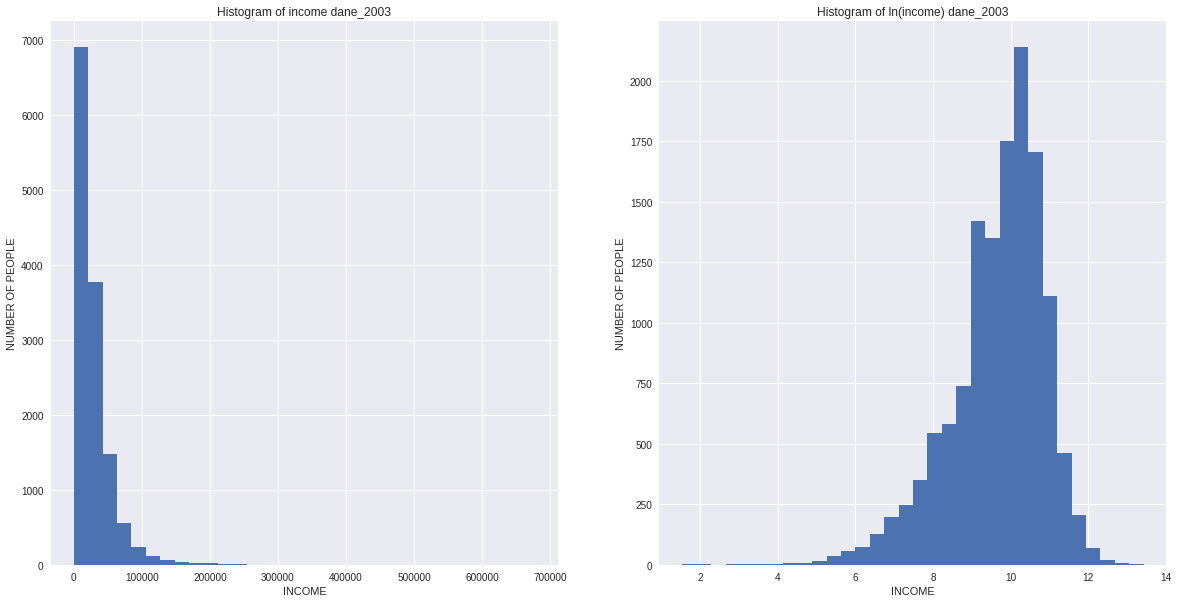

In [48]:
'''
  this function display on screen two separate histograms,
  the left one is histogram of INCOME, and the right one is histogram of
  natural logarithm of INCOME ( ln(INCOME) )

  Parameters
  ---------
  dataframe : pandas.dataframe object
  name : string
    dataset name

'''
def draw_hist(dataframe, name):
  ### number of bins via Huntsberg method
  k = int(round(1 + 3.3 * np.log(len(dict_of_dataframes['dane_2003']['INCOME']))))
  # plt.style.available
  plt.style.use('seaborn')
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
  ax1.hist(dataframe['INCOME'], bins = k)
  ax2.hist(np.log(dataframe['INCOME']), bins = k)
  ax1.set_ylabel('NUMBER OF PEOPLE')
  ax2.set_ylabel('NUMBER OF PEOPLE')
  ax1.set_xlabel('INCOME')
  ax2.set_xlabel('INCOME')
  ax1.set_title('Histogram of income ' + name)
  ax2.set_title('Histogram of ln(income) ' + name)


draw_hist(dict_of_dataframes['dane_2003'], 'dane_2003')

#for key, value in dict_of_dataframes.items():
#  draw_hist(value, key)


# <a name='a8'></a> Drawing Lorenz Curve

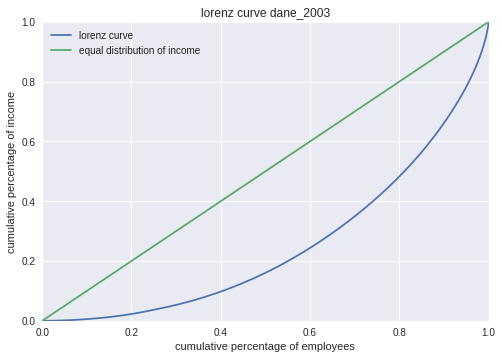

In [50]:
'''
  This function displays the Lorenz curve, by means of which
  the distribution of income in the studied sample can be determined

  Parameters
  ---------
  dataframe : pandas.dataframe object
  name : string
    dataset name

'''
def draw_lorenz(dataframe, name):
  serie = dataframe['INCOME'].copy()
  tmp_value_list = []
  tmp_percentage_list = []
  serie.sort_values(ascending = True, inplace = True)
  serie_sum = np.sum(serie)
  serie_len = len(serie)
  for i, each in enumerate(serie):
    tmp_value_list.append(each / serie_sum)
    tmp_percentage_list.append(i / serie_len)
  fig, ax = plt.subplots()
  # lorenz curve plot:
  plt.plot(tmp_percentage_list, np.cumsum(tmp_value_list))
  # equal distribution line:
  plt.plot([0, 1], [0, 1])
  # other attributes:
  plt.axis([0, 1, 0, 1])
  plt.xlabel('cumulative percentage of employees')
  plt.ylabel('cumulative percentage of income')
  plt.title(name)
  plt.legend(['lorenz curve', 'equal distribution of income'])


draw_lorenz(dict_of_dataframes['dane_2003'], 'lorenz curve dane_2003')

#for key, value in dict_of_dataframes.items():
#  draw_lorenz(value, key, idx)
